In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
sns.set()

In [55]:
df = pd.read_pickle('../Data/Data_final.pickle')

In [56]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

In [58]:
df.head()

,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,cast,crew
0,None,0.0,"[Drama, Crime]",fi,Taisto Kasurinen is a Finnish coal miner whose...,3.860491,"[Villealfa Filmproduction Oy, Finnish Film Fou...",[Finland],1988-10-21,0.0,...,"[suomi, Deutsch]",Released,NaN,Ariel,7.1,44.0,1988,0.000000,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä...",[Aki Kaurismäki]
1,None,0.0,"[Drama, Comedy]",fi,"An episode in the life of Nikander, a garbage ...",2.292110,[Villealfa Filmproduction Oy],[Finland],1986-10-16,0.0,...,"[English, suomi, svenska]",Released,NaN,Shadows in Paradise,7.1,35.0,1986,0.000000,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman...",[Aki Kaurismäki]
2,None,4000000.0,"[Crime, Comedy]",en,It's Ted the Bellhop's first night on the job....,9.026586,"[Miramax Films, A Band Apart]",[United States of America],1995-12-09,4300000.0,...,[English],Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,539.0,1995,1.075000,"[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[Allison Anders, Alexandre Rockwell, Robert Ro..."
3,None,0.0,"[Action, Thriller, Crime]",en,"While racing to a boxing match, Frank, Mike, J...",5.538671,"[Universal Pictures, Largo Entertainment, JVC ...","[Japan, United States of America]",1993-10-15,12136938.0,...,[English],Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.4,79.0,1993,0.000000,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary...",[Stephen Hopkins]
4,Star Wars Collection,11000000.0,"[Adventure, Action, Science Fiction]",en,Princess Leia is captured and held hostage by ...,42.149697,"[Lucasfilm, Twentieth Century Fox Film Corpora...",[United States of America],1977-05-25,775398007.0,...,[English],Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,6778.0,1977,70.490728,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",[George Lucas]


In [60]:
df.dtypes

belongs_to_collection            object
budget                          float64
genres                           object
original_language                object
overview                         object
popularity                      float64
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
vote_average                    float64
vote_count                      float64
release_year                      int64
return                          float64
cast                             object
crew                             object
dtype: object

In [61]:
df.isna().sum()

belongs_to_collection    40954
budget                       0
genres                    2384
original_language           11
overview                   941
popularity                   0
production_companies     11817
production_countries      6219
release_date                 0
revenue                      0
runtime                    246
spoken_languages          3774
status                      80
tagline                  25026
title                        0
vote_average                 0
vote_count                   0
release_year                 0
return                       0
cast                      2354
crew                       723
dtype: int64

<AxesSubplot: xlabel='budget', ylabel='popularity'>

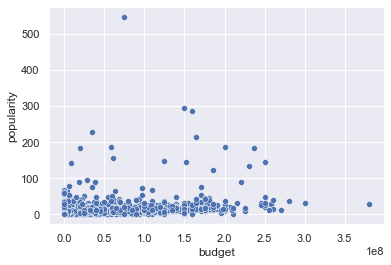

In [62]:
sns.scatterplot(data=df, x='budget', y='popularity')

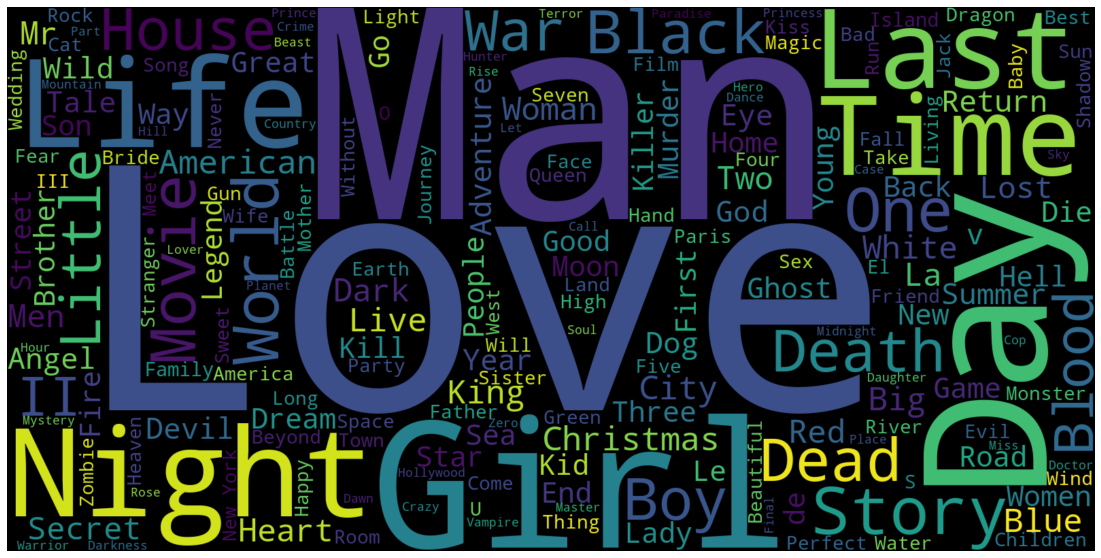

In [9]:
texto = " ".join(df['title'])

wordcloud = WordCloud(width=1600, height=800).generate(texto)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [63]:
df_numerical = df[['budget','popularity','revenue','runtime','vote_average','vote_count','return']]
#df_categorical = df[['title','director']]

In [64]:
df_numerical.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,return
0,0.0,3.860491,0.0,69.0,7.1,44.0,0.000000
1,0.0,2.292110,0.0,76.0,7.1,35.0,0.000000
2,4000000.0,9.026586,4300000.0,98.0,6.5,539.0,1.075000
3,0.0,5.538671,12136938.0,110.0,6.4,79.0,0.000000
4,11000000.0,42.149697,775398007.0,121.0,8.1,6778.0,70.490728


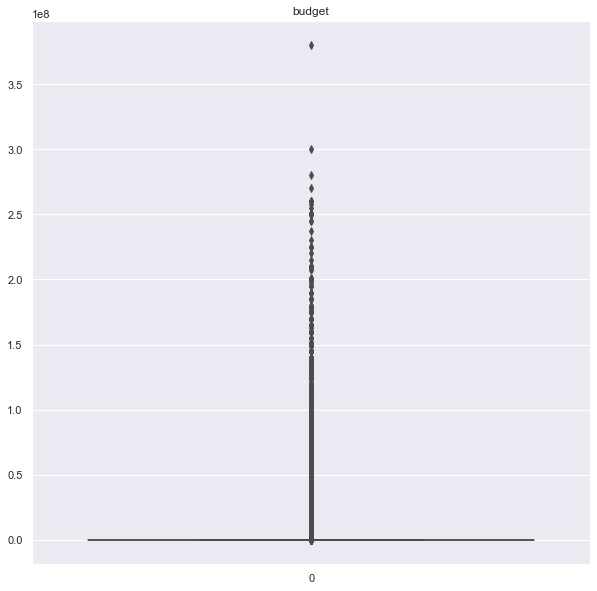

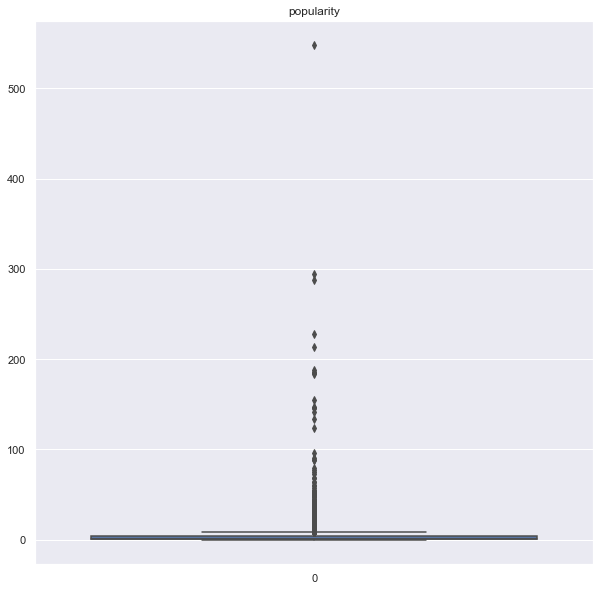

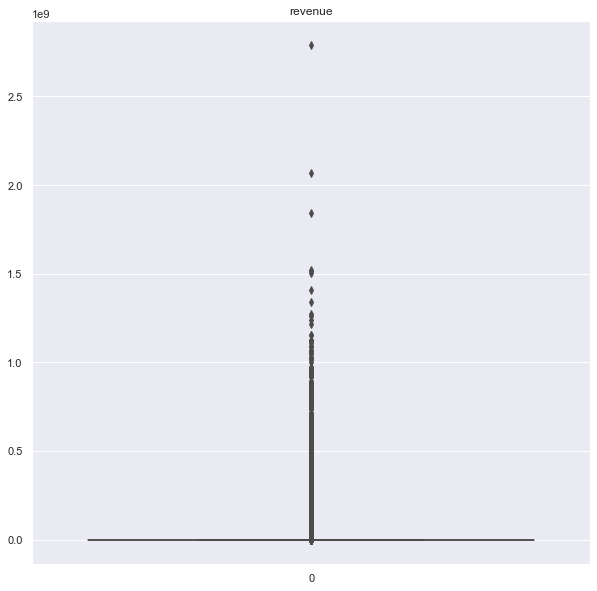

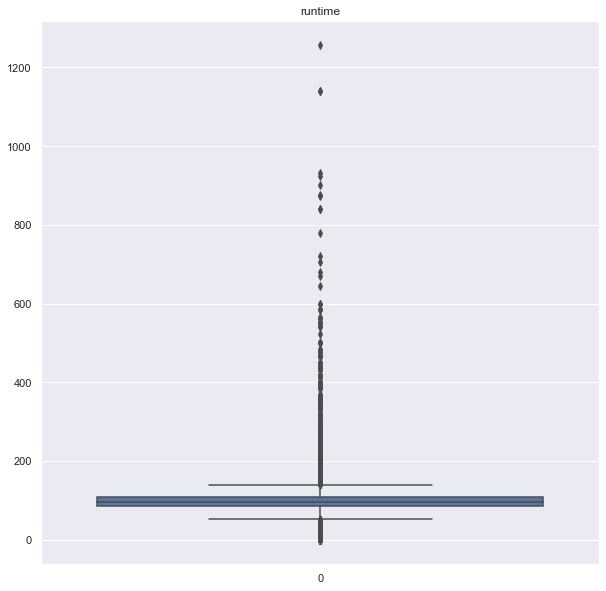

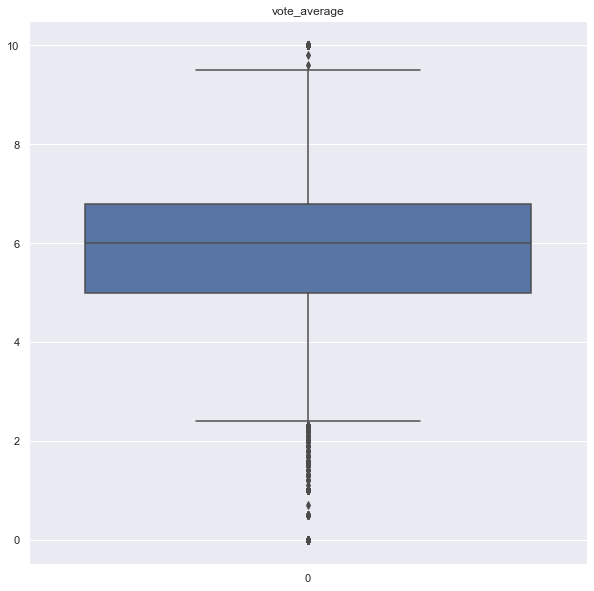

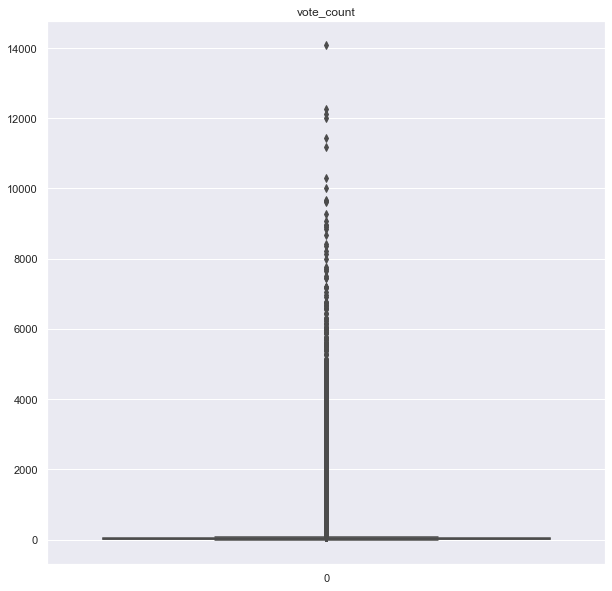

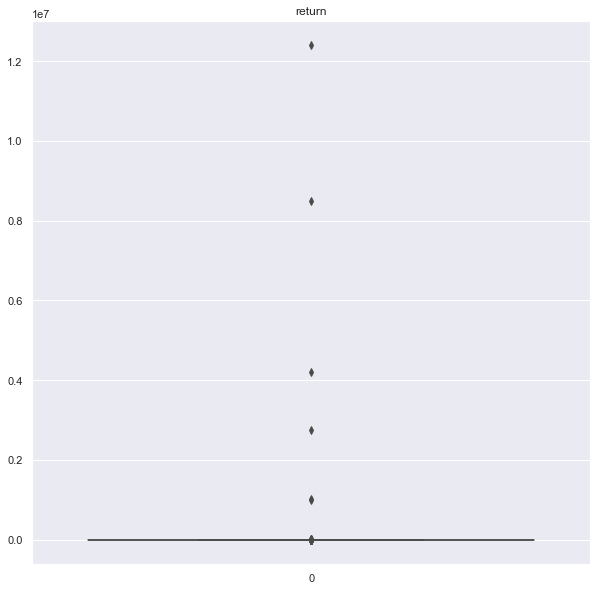

In [65]:
for a in df_numerical.columns:
    if not df_numerical.empty:
        plt.figure(figsize=(10, 10))
        sns.boxplot(data=df_numerical[a])

        # Ajusta el tamaño de la figura
        
        plt.title(a)
        # Muestra el diagrama de caja
        plt.show()

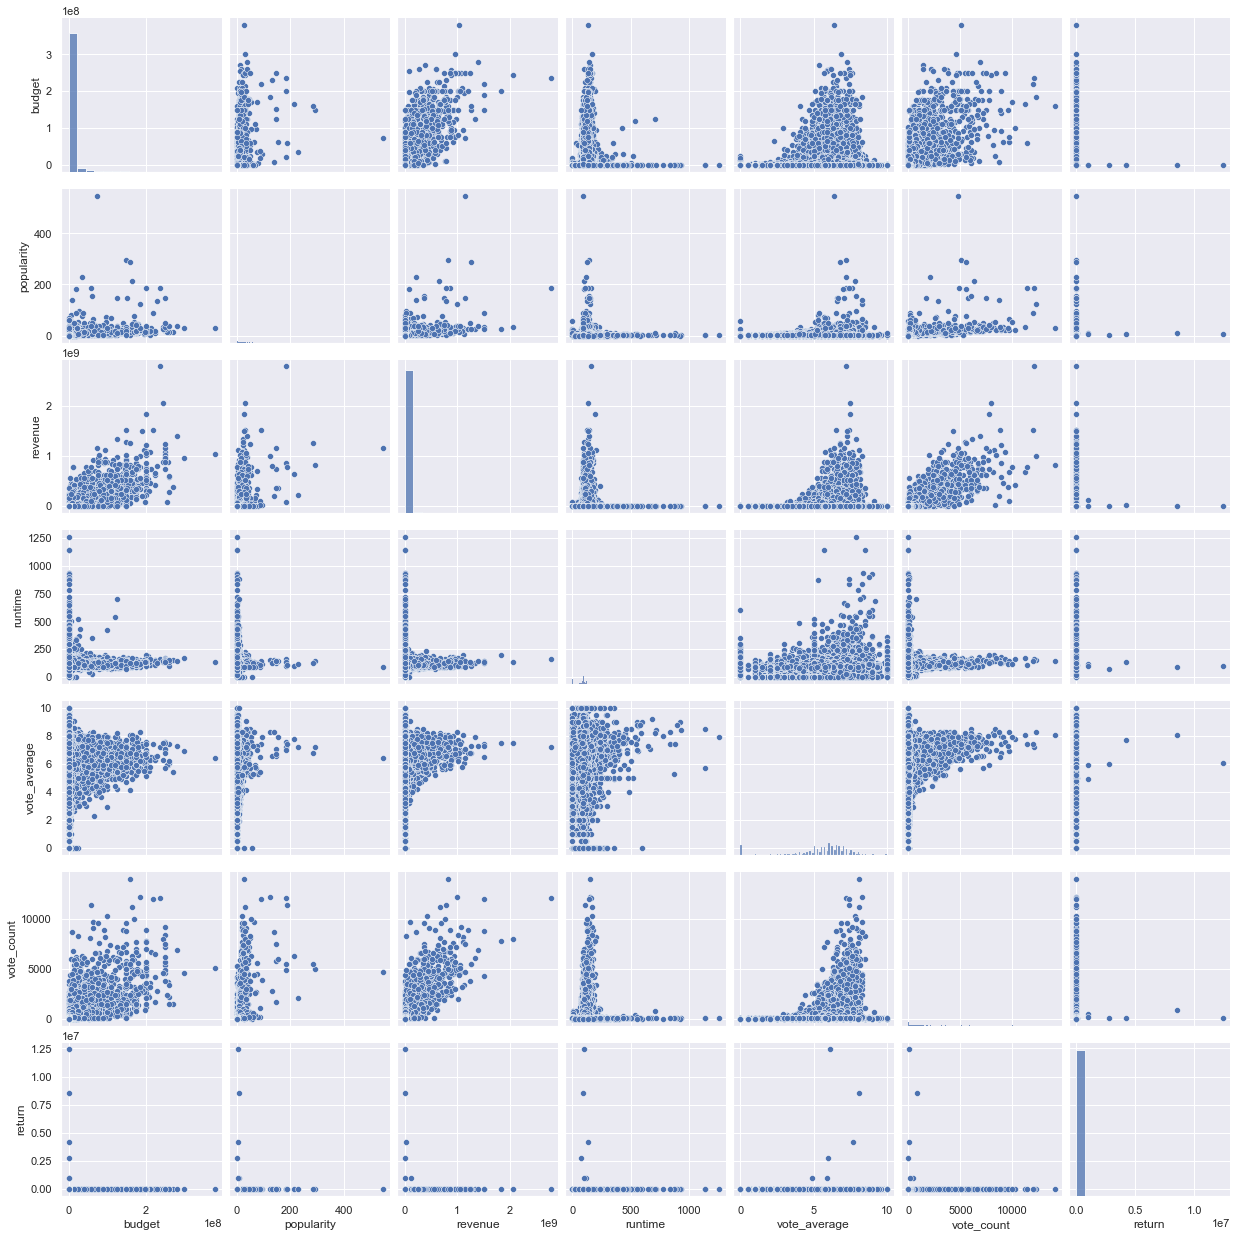

In [70]:
sns.pairplot(df_numerical)

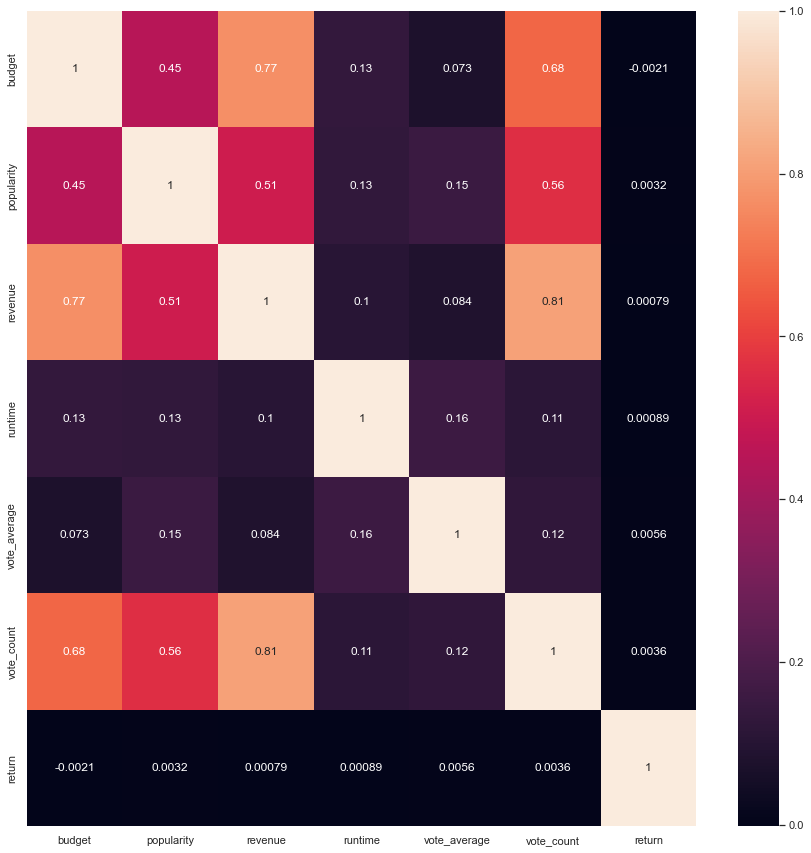

In [69]:
fig = plt.figure(figsize = (15,15))
sns.heatmap(df_numerical.corr(), annot = True)
plt.show()

In [ ]:
for categorical in df_categorical.columns:
    sns.barplot(x='columna_categorica', y='columna_numerica', data=df_categorical)

    # Muestra el gráfico de barras
    plt.show()

In [26]:
l = ['budget','popularity','revenue','runtime','vote_average','vote_count','return']

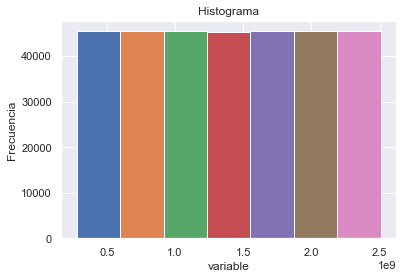

In [71]:
plt.hist(df_numerical, bins=1)
plt.xlabel('variable')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.show()


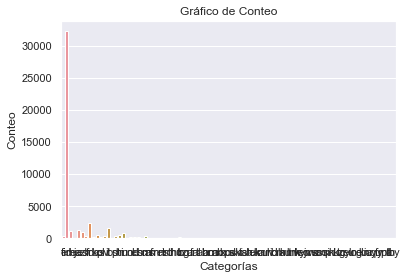

In [76]:
sns.countplot(x='original_language' ,data=df)

# Personalizar el gráfico
plt.xlabel('Categorías')
plt.ylabel('Conteo')
plt.title('Gráfico de Conteo')

# Mostrar el gráfico
plt.show()

In [39]:
df.dropna(subset=['original_language'], inplace=True)

In [42]:
df[df['original_language'].isna()]

,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,cast,crew
IdMovie,,,,,,,,,,,,,,,,,,,,,
